In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
from model.classifier import NCC
from util.datasets import train_test_split, artificial_one
from util.plotlib import *
from util.metrics import *
from sklearn.utils import shuffle

In [20]:
samples, targets = artificial_one(10)
samples = normalize(samples)

In [21]:
realizations = 20
save_state_hitrate_k = []
save_state_cfs_matrix_k = []
save_state_samples_k = []
save_state_targets_k = []
save_state_predicted_k = []

In [22]:
for r in range(realizations):
    _hitrate = 0
    _cfs_matrix = []

    samples, targets = shuffle(samples, targets)

    x_train, x_test, y_train, y_test = train_test_split(samples, targets, .75)
    clf = NCC(samples=x_train, targets=y_train)

    predicted = clf.predict(x_test)
    _hitrate = hitrate(y_test, predicted)
    _cfs_matrix = confusion_matrix(y_test, predicted, len(np.unique(targets)))

    # saving definitive data
    save_state_samples_k.append([samples])
    save_state_targets_k.append([targets])
    save_state_predicted_k.append([predicted])
    save_state_hitrate_k.append([_hitrate])
    save_state_cfs_matrix_k.append([_cfs_matrix])

In [23]:
# visualizing hitrates
save_state_hitrate_k = np.asarray(save_state_hitrate_k)
save_state_hitrate_k

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [24]:
# better and worst hitrate indexes
argsminmax(save_state_hitrate_k, np.argmax)

0

In [25]:
argsminmax(save_state_hitrate_k, np.argmin)

0

In [26]:
# accuracy and std by k-value
acc = np.asarray(accuracy(save_state_hitrate_k)).reshape((1, 1))
argmax, argmin = argsminmax(acc, np.argmax), argsminmax(acc, np.argmin)

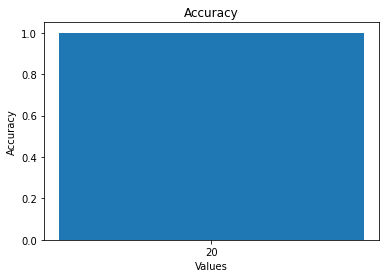

In [27]:
plot_bar_acc(accuracy(save_state_hitrate_k), [realizations])

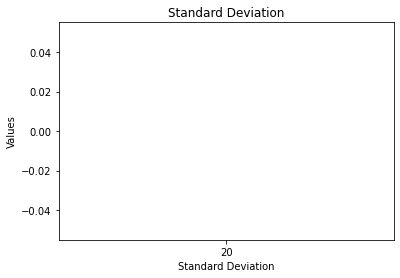

In [28]:
std = standard_deviation(save_state_hitrate_k)
plot_bar_std(std, [realizations])

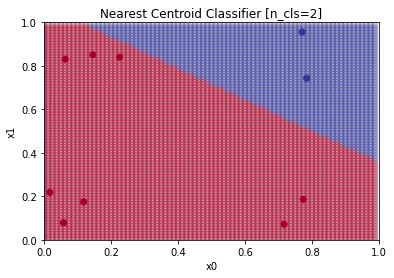

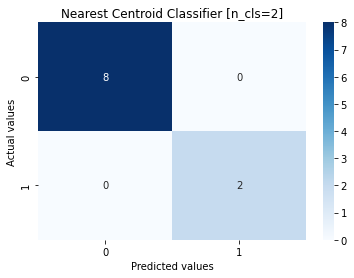

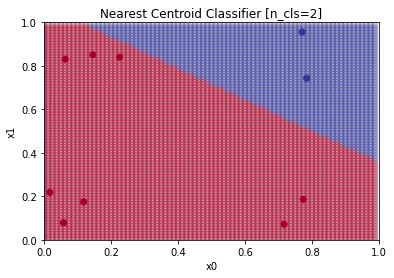

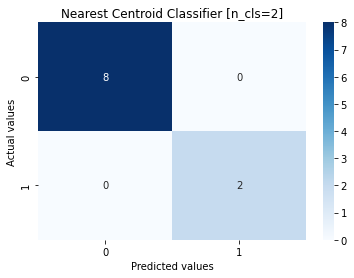

In [29]:
for i in (argmax, argmin):
    tsamples = save_state_samples_k[i][i]
    ttargets = save_state_targets_k[i][i]

    x_train, x_test, y_train, y_test = train_test_split(tsamples, ttargets, .75)
    clf = NCC(x_train, y_train)
    plot_decision_boundary(clf, x_test, y_test)
    plot_confusion_matrix(clf, x_test, y_test)